# MasterControl MLOps Engineer Interview Sample Problem
Welcome to MasterControl! We are glad to see you are interested in joining us! Below is a sample ML problem. Please follow the instructions below. Enjoy!

## Problem Description
We have created a dataset that is generified and anonymized that is available in the `dataset.csv` file. This notebook does some basic data exploration and trains a model to classify the data. This exercise is to take the next step and deploy the model trained in this notebook. Please build an API for it, and deploy the API as a micro-service in cloud (e.g., AWS or GCP)

For MLOps engineers, notebook-code for data-exploration, model training and prediction is provided. The goal for an MLOps engineer is to take this code, productionize it, and deploy it in the cloud as a service. Specifically, the major MLOps tasks in this project include:

1. Explore the given training dataset, find any boundaries, normalize the dataset as needed
2. Productionize the model-training code
*   build, evaluate a model using the given training dataset
*   save the trained model
3. Productionize the model-prediction code
* load from the saved trained model
* predict, evaluate using a test dataset
4. Build an API to provide the model-prediction as a service
* assume a dataset similar to the training dataset
* dataOps: describe (based on your prior experience) how you would propose to handle the data coming from a cloud storage (e.g., Parquet tables on S3)
5. Deploy the model-prediction-API as a service in cloud (e.g., AWS, or GCP)


In [1]:
DATASET_PATH = "tht-sample-tabular-data.csv"

In [2]:
# %pip install pandas scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import pickle
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv("tht-sample-tabular-data.csv")
data

,id,label,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11
0,0,1,66,-13.500000,0.454545,5.181818,0.272727,1781,0.241437,10.969118,0.879281,770,5
1,1,1,75,26.586667,0.413333,65.000000,0.909091,152,0.822368,209.151316,0.144737,1632,3
2,2,0,4,-25.250000,0.250000,-25.250000,0.250000,6,0.166667,701.333333,0.833333,163,3
3,3,0,36,-115.472222,0.027778,-142.636364,0.000000,1803,0.210205,-7.278979,0.513034,643,8
4,4,0,124,319.008064,0.427419,-95.909091,0.000000,180,0.833333,120.305556,0.844444,648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,7,4.142857,0.571429,4.142857,0.571429,1,0.000000,-27.000000,0.000000,1824,1
9996,9996,0,52,106.346154,0.807692,62.727273,0.545455,6,0.333333,11.000000,0.166667,1791,1
9997,9997,0,5,22.800000,0.200000,22.800000,0.200000,581,0.296041,-6.148021,0.339071,490,2
9998,9998,0,178,-25.297753,0.000000,-26.363636,0.000000,198,0.000000,-26.464646,0.191919,972,5


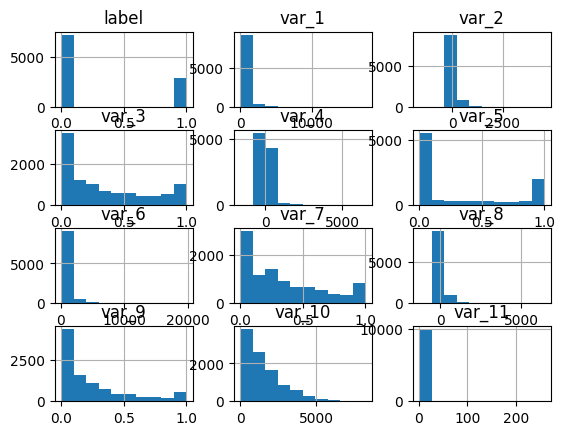

In [4]:
data = data.drop("id", axis=1)
data.hist()
plt.show()

1 3.2617 258 38


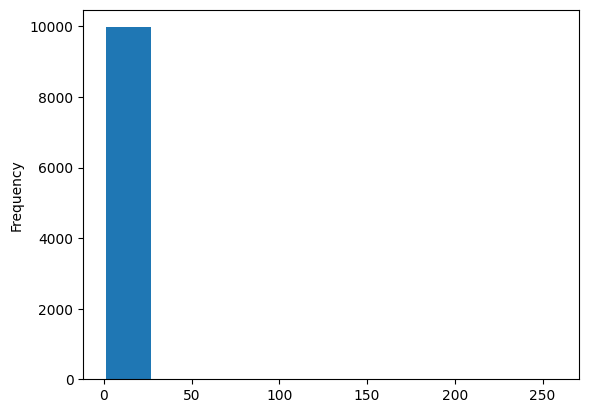

In [5]:
print(data["var_11"].min(), data["var_11"].mean(), data["var_11"].max(), data["var_11"].nunique())
data["var_11"].plot.hist()
plt.show()

<AxesSubplot: >

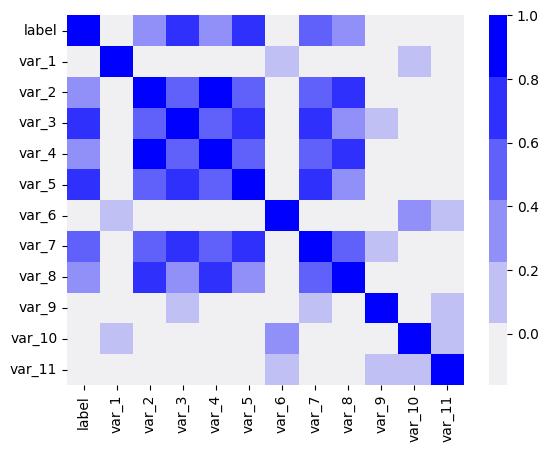

In [6]:
sn.heatmap(data.corr(), cmap=sn.color_palette("light:b"))

In [7]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"], axis=1), data["label"])

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Random forest:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

Random forest:
Accuracy: 0.8976
F1: 0.8131386861313868


In [8]:
rf_model.feature_importances_

array([0.03464661, 0.05736665, 0.10632811, 0.1704079 , 0.37132532,
       0.03368683, 0.08905094, 0.05729236, 0.03069986, 0.03304084,
       0.01615459])

In [9]:
final_model = rf_model

In [10]:
# Save the model
with open("pickled_tabular_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [11]:
# Load the saved model
with open("pickled_tabular_model.pkl", "rb") as file:
    final_model = pickle.load(file)

In [12]:
# Load test data
test_data = pd.read_csv("tht-test-tabular-data.csv")

In [13]:
print(test_data)

     label  var_1       var_2     var_3       var_4     var_5  var_6  \
0        0    371  -20.981132  0.026954  -22.454545  0.000000   2467   
1        1     11  604.818182  0.909091  604.818182  0.909091    161   
2        0    619  -17.159935  0.067851   -5.000000  0.272727   2456   
3        0     67  -91.432836  0.432836   50.272727  0.545455      2   
4        1    171   61.836257  0.888889   55.454545  0.909091    309   
..     ...    ...         ...       ...         ...       ...    ...   
995      1     22  236.000000  0.772727  171.363636  0.727273      5   
996      0   1255  152.659761  0.931474   27.818182  0.454545    242   
997      1     10   28.500000  0.600000   28.500000  0.600000    128   
998      0    265  -37.867925  0.003774  -25.727273  0.000000    402   
999      0     20  -94.600000  0.100000  -86.181818  0.000000     55   

        var_7       var_8     var_9  var_10  var_11  
0    0.051885  -22.670045  0.304013     531       7  
1    0.850932  444.335404  

In [18]:
# Test saved model
y_pred = final_model.predict(test_data.drop(["label"], axis=1)).tolist()
print("Test Accuracy:", metrics.accuracy_score(test_data["label"], y_pred))
print("Test F1:", metrics.f1_score(test_data["label"], y_pred))

Test Accuracy: 0.903
Test F1: 0.8193668528864058


In [20]:
print(y_pred)

# only return y_pred

[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 